### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arrow

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
display('Sample records from the train dataset:', train.head())
display('Sample records from the test dataset:', test.head())

'Sample records from the train dataset:'

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


'Sample records from the test dataset:'

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [3]:
display('Summary stats for train dataset:', train.describe(include = 'all').T)
display('Summary stats for test dataset:', test.describe(include = 'all').T)

'Summary stats for train dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,913000,1826,2016-02-26,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,913000,NaN,NaN,NaN,5.5,2.87228,1,3,5.5,8,10
item,913000,NaN,NaN,NaN,25.5,14.4309,1,13,25.5,38,50
sales,913000,NaN,NaN,NaN,52.2503,28.8011,0,30,47,70,231


'Summary stats for test dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,45000,NaN,NaN,NaN,22499.5,12990.5,0,11249.8,22499.5,33749.2,44999
date,45000,90,2018-03-07,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,45000,NaN,NaN,NaN,5.5,2.87231,1,3,5.5,8,10
item,45000,NaN,NaN,NaN,25.5,14.431,1,13,25.5,38,50


In [4]:
display('Count of missing data in train dataset:\n', train.isna().sum())
display('Count of missing data in test dataset:\n', test.isna().sum())

'Count of missing data in train dataset:\n'

date     0
store    0
item     0
sales    0
dtype: int64

'Count of missing data in test dataset:\n'

id       0
date     0
store    0
item     0
dtype: int64

In [5]:
print('The date field in the train dataset is saved as:', type(train.date[0]))
print('The store field in the train dataset is saved as:', type(train.store[0]))
print('The item field in the train dataset is saved as:', type(train.item[0]))
print('The sales field in the train dataset is saved as:', type(train.sales[0]))

The date field in the train dataset is saved as: <class 'str'>
The store field in the train dataset is saved as: <class 'numpy.int64'>
The item field in the train dataset is saved as: <class 'numpy.int64'>
The sales field in the train dataset is saved as: <class 'numpy.int64'>


In [6]:
display('Cross-tabulating stores and items in the train dataset:', pd.crosstab(train.item, train.store))
display('Cross-tabulating stores and items in the test dataset:', pd.crosstab(test.item, test.store))

'Cross-tabulating stores and items in the train dataset:'

store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
2,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
3,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
4,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
5,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
6,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
7,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
8,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
9,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826


'Cross-tabulating stores and items in the test dataset:'

store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,90,90,90,90,90,90,90,90,90,90
2,90,90,90,90,90,90,90,90,90,90
3,90,90,90,90,90,90,90,90,90,90
4,90,90,90,90,90,90,90,90,90,90
5,90,90,90,90,90,90,90,90,90,90
6,90,90,90,90,90,90,90,90,90,90
7,90,90,90,90,90,90,90,90,90,90
8,90,90,90,90,90,90,90,90,90,90
9,90,90,90,90,90,90,90,90,90,90


The per day value of sale across all store-item pairs ranges from 0 to 231.
The average per day value of sale across all store-item pair is 52 where as the median value is 47.

The value of total sale across all stores ranges from 3320009 to 6120128
The average value of total sale for a store across all items is 4770451, where as the median value is 5019307.

The value of per day sale across all items ranges from 335230 to 1607442
The average value of total sale for an item across all stores is 954090, where as the median value is 938041.



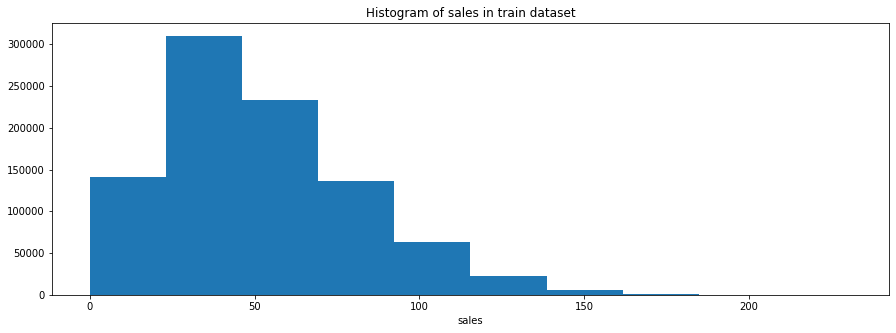

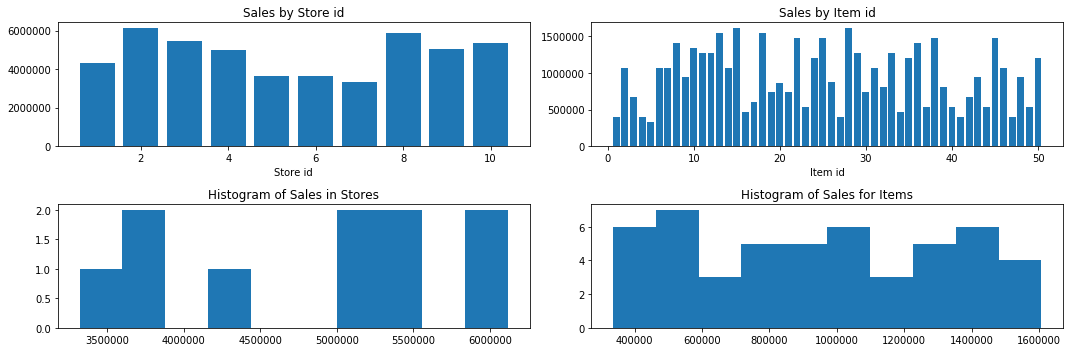

In [11]:
print('The per day value of sale across all store-item pairs ranges from %i to %i.' 
      % (min(train.sales), max(train.sales)))
print('The average per day value of sale across all store-item pair is %i where as the median value is %i.\n' 
      % (np.mean(train.sales), np.median(train.sales)))

print('The value of total sale across all stores ranges from %i to %i'
      % (min(train.groupby(['store'])['sales'].sum()), max(train.groupby(['store'])['sales'].sum())))
print('The average value of total sale for a store across all items is %i, where as the median value is %i.\n' 
      % (np.mean(train.groupby(['store'])['sales'].sum()), np.median(train.groupby(['store'])['sales'].sum())))

print('The value of per day sale across all items ranges from %i to %i'
      % (min(train.groupby(['item'])['sales'].sum()), max(train.groupby(['item'])['sales'].sum())))
print('The average value of total sale for an item across all stores is %i, where as the median value is %i.\n' 
      % (np.mean(train.groupby(['item'])['sales'].sum()), np.median(train.groupby(['item'])['sales'].sum())))

plt.figure(figsize = (15, 5))
plt.hist(train.sales)
plt.title('Histogram of sales in train dataset')
plt.xlabel('sales')
plt.show()

plt.figure(figsize = (15, 5))

plt.subplot(2,2,1)
plt.bar(np.arange(1,11,1), train.groupby(['store'])['sales'].sum())
plt.title('Sales by Store id')
plt.xlabel('Store id')

plt.subplot(2,2,2)
plt.bar(np.arange(1,51,1), train.groupby(['item'])['sales'].sum())
plt.title('Sales by Item id')
plt.xlabel('Item id')

plt.subplot(2,2,3)
plt.hist(train.groupby(['store'])['sales'].sum())
plt.title('Histogram of Sales in Stores')

plt.subplot(2,2,4)
plt.hist(train.groupby(['item'])['sales'].sum())
plt.title('Histogram of Sales for Items')

plt.tight_layout()
plt.show()

#### Observations
<ol>
    <li>The <i>train</i> dataset has 913,000 records for 10 stores. For each store there might be upto 50 items sold.
    <li>The <i>test</i> dataset has 45,000 records for 10 stores. For each store there might be upto 50 items sold.
    <li>There is no missing data in either train or test dataset.
    <li>The data fields must be appropriately typecasted.
    <ul>
        <li>date field to <i>type datetime</i>
        <li>store field to <i>type category</i>
        <li>item field to <i>type category</i>
    </ul>
    <li>There are the same number of records for every store-item pair in the train (1826 per pair) and test (90 per pair) datasets.
    <li>The total per store and per item sales vary significantly and do not exhibit any obvious distribution.
</ol>

#### Typecasting the data fields

In [12]:
train.date = pd.to_datetime(train.date, format = '%Y-%m-%d')
test.date = pd.to_datetime(test.date, format = '%Y-%m-%d')

train.store = train.store.astype('category')
test.store = test.store.astype('category')

train.item = train.item.astype('category')
test.item = test.item.astype('category')

#### Visualizing Data as Timeseries

##### Gross Sales in a Store

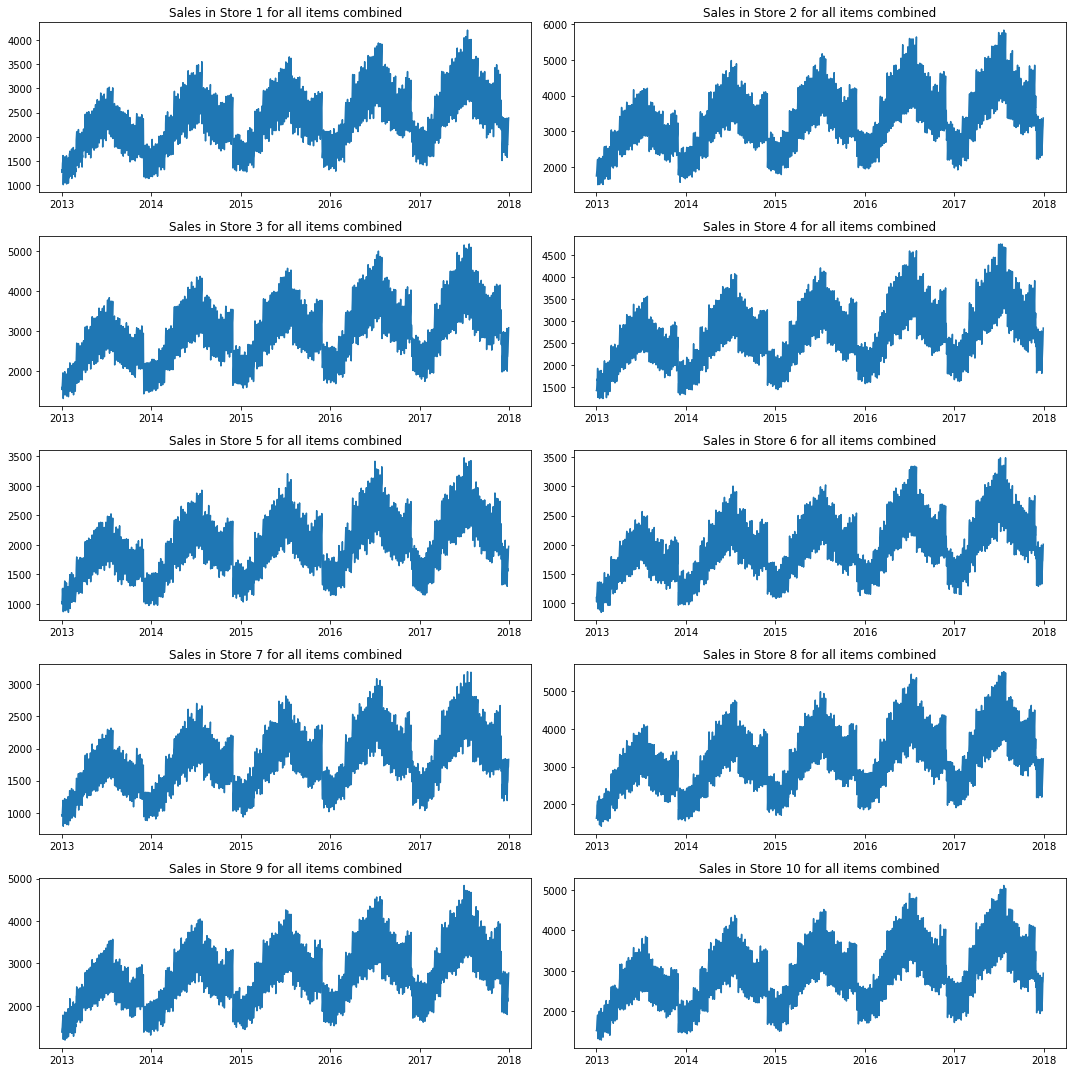

In [31]:
plt.figure(figsize = (15, 15))
j = 1

for store in range(1, 11):
    df = train.query('store == @store')
    df = df.groupby(by = 'date')['sales'].sum()
    plt.subplot(5, 2, j)
    plt.plot(df.index, df, ls = '-')
    plt.title('Sales in Store %i for all items combined' % store)
    j += 1

plt.tight_layout()
plt.show()

##### Gross Sales for an Item

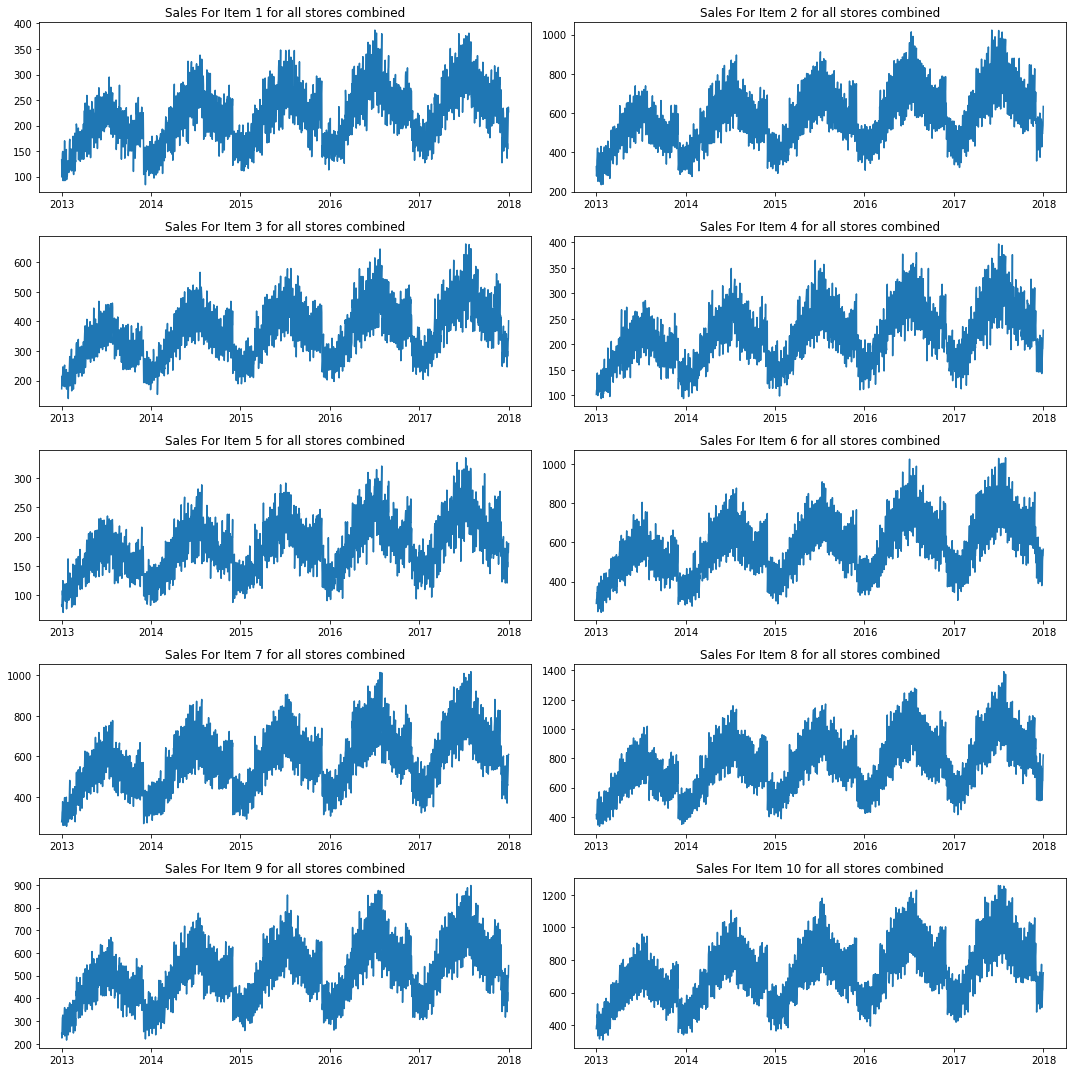

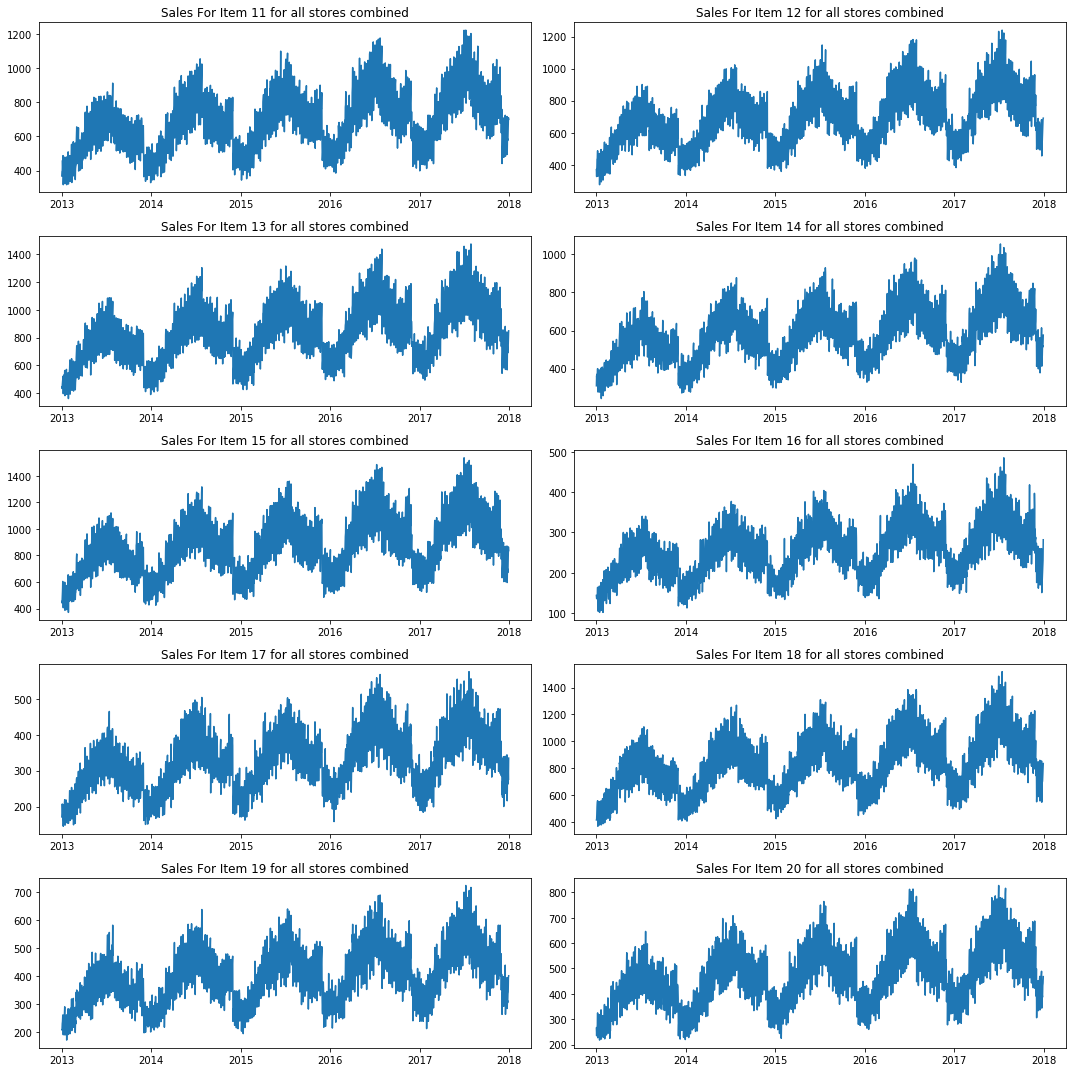

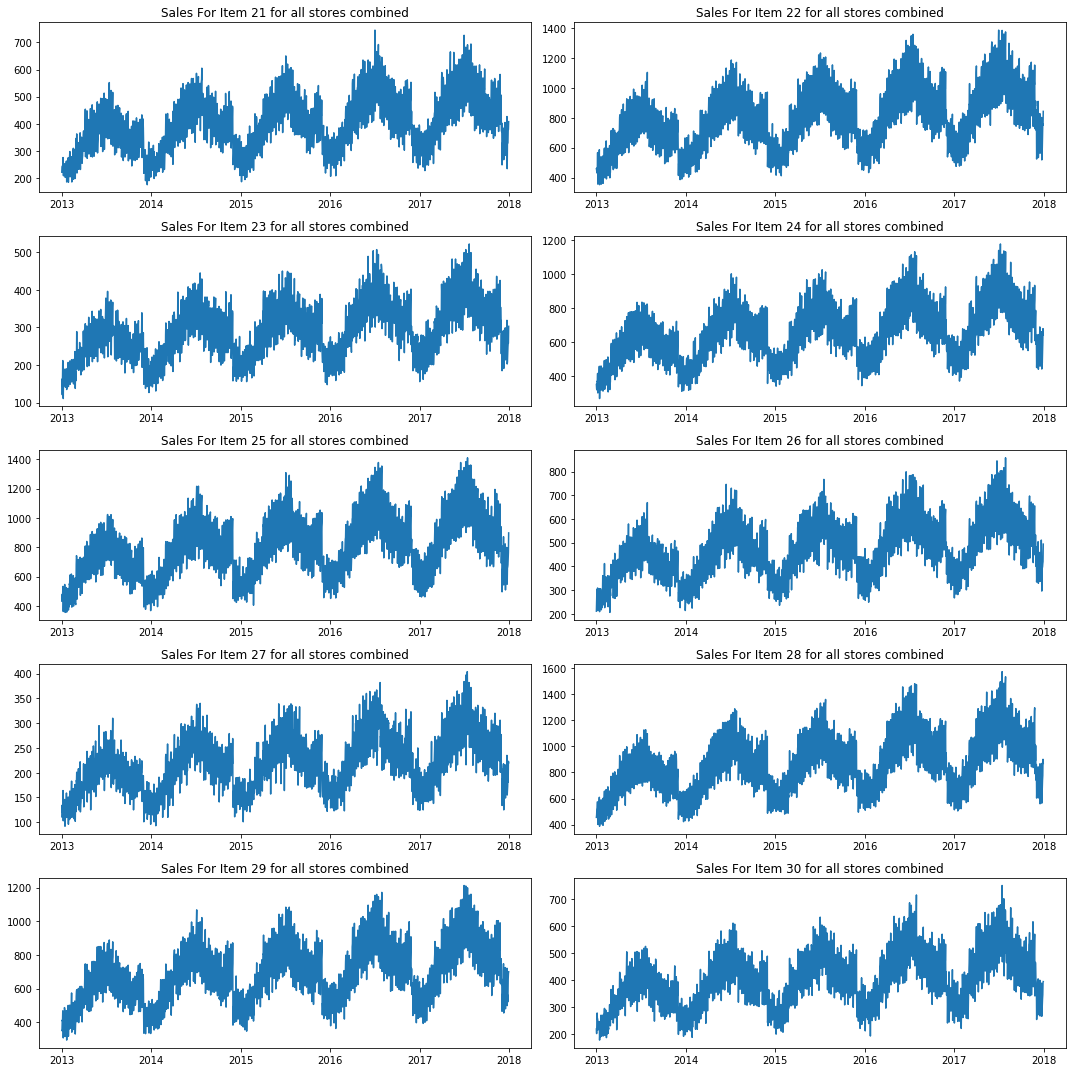

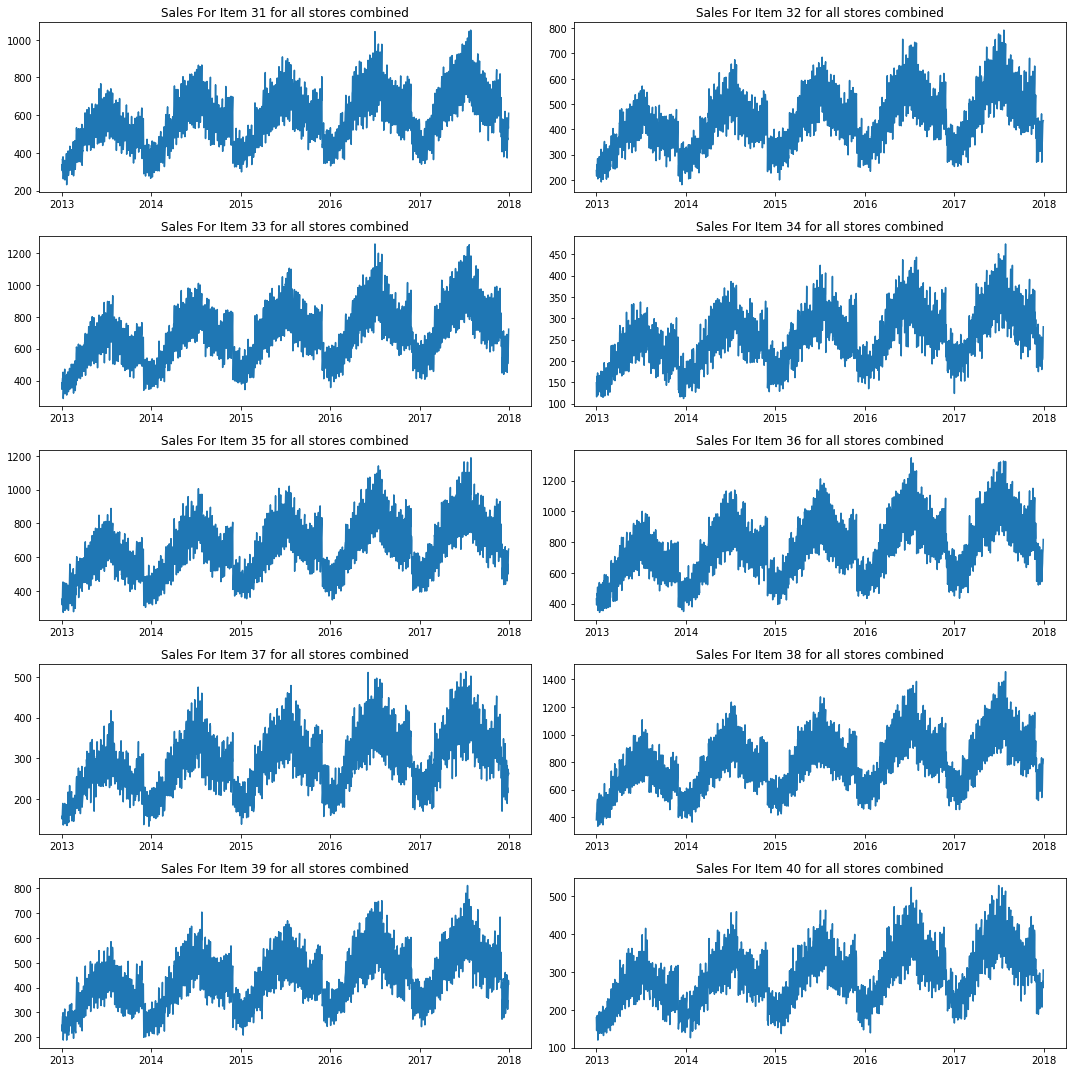

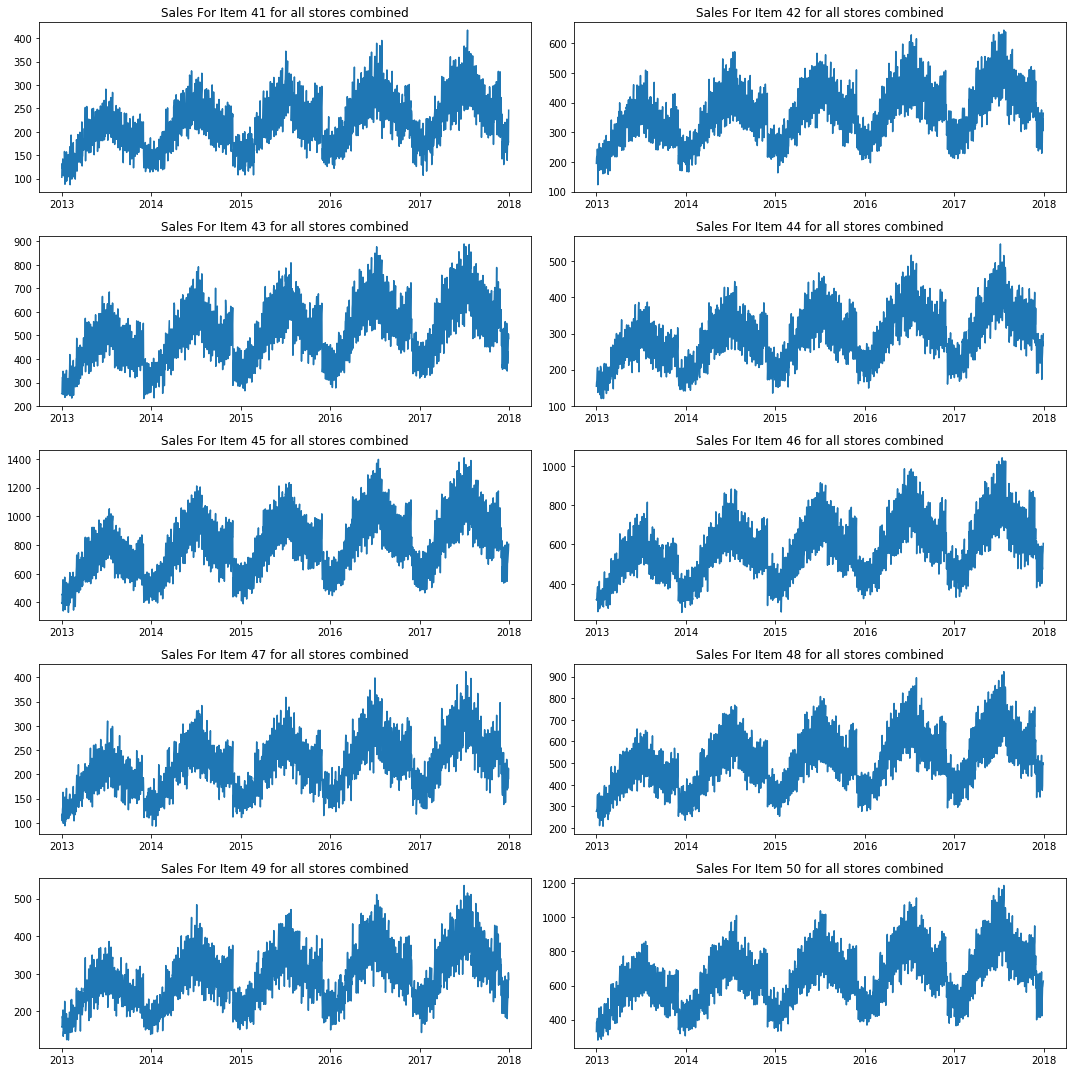

In [32]:
for group in range(5):
    plt.figure(figsize = (15, 15))
    j = 1

    for item in range(group*10 + 1 , group*10 + 11):
        df = train.query('item == @item')
        df = df.groupby(by = 'date')['sales'].sum()
        plt.subplot(5, 2, j)
        plt.plot(df.index, df, ls = '-')
        plt.title('Sales For Item %i for all stores combined' % item)
        j += 1

    plt.tight_layout()
    plt.show()

#### Observations
<ol>
    <li>At a gross level, the store sales exhibit similar patterns for all stores:
        <ul>
            <li>Within a year, sales are cyclical, increasing month-on-month for about half the year and then decreasing month-on-month for the rest of the year.
            <li>This monthly pattern is repeated every year.
            <li>Year-on-year, the month-over-month sales (same month across different years) show an upward trend.
        </ul>
    <li>At a gross level, the item sales exhibit similar patters for all items and the patterns are the same as discussed for store sales.
</ol>

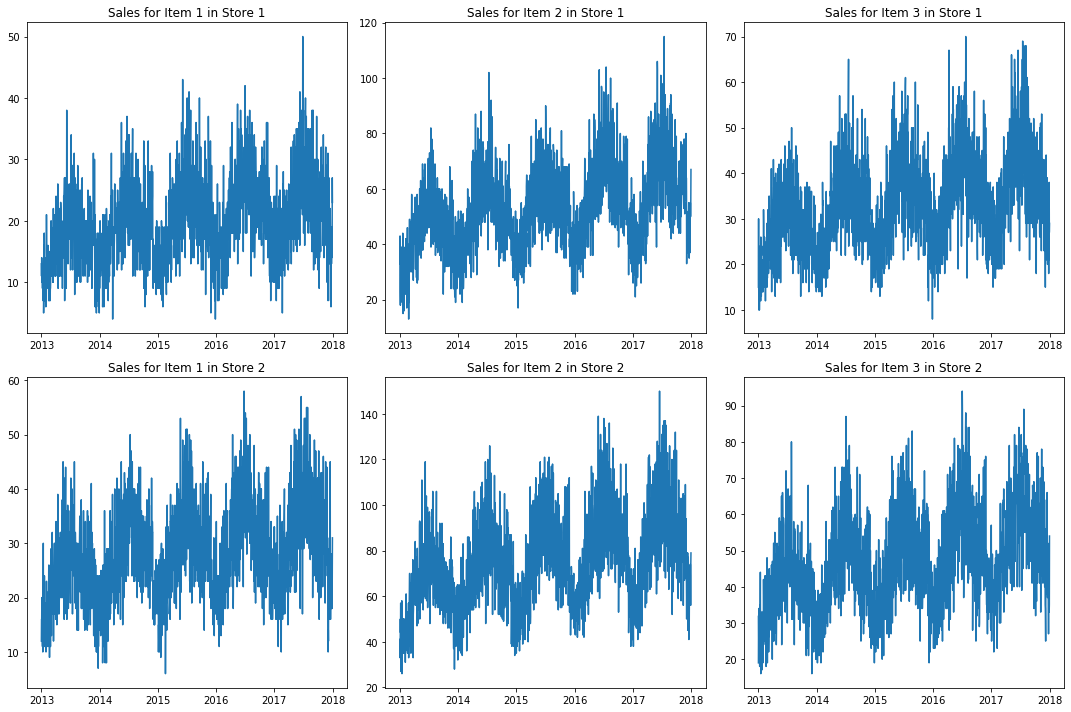

In [67]:
plt.figure(figsize = (15, 10))
j = 1

for store in range(1, 3):
    df = train.query('store == @store')
    df = df.groupby(by = ['item', 'date'])['sales'].sum()
    for item in range(1, 4):
        plt.subplot(2, 3, j)
        plt.plot(df[item].index, df[item], ls = '-')
        plt.title('Sales for Item %i in Store %i' % (item, store))
        j += 1

plt.tight_layout()
plt.show()

In [59]:
df[1]

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Name: sales, Length: 1826, dtype: int64

#### Range of TimeSeries for every Store-Item Pair

In [84]:
stores, items = np.arange(1, 11), np.arange(1, 51)

for store in stores:
    print('\nFor Store %i' % store)
    for item in items:
        foo = train.query('store == @store & item == @item')['date']
        print('For the Item %i, the data ranges over' % item, foo.min(), foo.max())
        




For Store 1
For the Item 1, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 2, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 3, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 4, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 5, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 6, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 7, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 8, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 9, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 10, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 11, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 12, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 13, the data ranges over 2013-01-01 00:00:00 20

For the Item 9, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 10, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 11, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 12, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 13, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 14, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 15, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 16, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 17, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 18, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 19, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 20, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 21, the data ranges over 2013-01-01 00:00:00 2017-12

For the Item 18, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 19, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 20, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 21, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 22, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 23, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 24, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 25, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 26, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 27, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 28, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 29, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 30, the data ranges over 2013-01-01 00:00:00 2017-1

For the Item 34, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 35, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 36, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 37, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 38, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 39, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 40, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 41, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 42, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 43, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 44, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 45, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 46, the data ranges over 2013-01-01 00:00:00 2017-1

For the Item 44, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 45, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 46, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 47, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 48, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 49, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 50, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00

For Store 10
For the Item 1, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 2, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 3, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 4, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 5, the data ranges over 2013-01-01 00:00:00 2017-12-31 00:00:00
For the Item 6, the data ranges over 2013-01-01 00:00:0